# Back Projection

`Back Projection` is a tomographic image reconstruction technique used to obtain an anatomical image from CT data (projections) by smearing the CT projections back onto an image at the angles they were acquired. The CT data is obtained by rotating the fan beam through an angle of $ 180^{\circ} $ _(we only rotate through this angle because a complete $ 360^{\circ} $ would be a duplication of data)_. As a result a point in the region being imaged must be included in all the projections.

<div align="center">
<img src ="images/arc_fanbeam.png" width="30%" height="30%" style="margin-right: 50px">
<img src ="images/fanbeam.png" width="30%" height="30%">
</div>

***
### The Radon Transform
To think of this mathematically, we note that different organs/tissues in the body have different attenuation coefficients and that the attenuation is exponential, since the fan beam moves about an angle $ \theta $ and collects the data at a distance $r$ _(from source to fan beam detector)_ we can write the following familiar equation 

$\displaystyle I = I_0 \exp \left(-\int{\mu(x,y)\, ds}\right)$

Hence by simply rearranging the above equation we simply find that the total attenuation $ p_{\theta}(r) $ for the angle $\theta$  at some position $r$ is given by:

$\displaystyle p_{\theta}(r) = \ln{\left(\frac{I}{I_0}\right)} = -\int \mu(x,y) \, ds$

Using polar coordinates we obtain the following form (The Radon Transform):

$\displaystyle p_{\theta}(r) = -\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} f(x,y)\delta(x\cos\theta+y\sin\theta - r) \, dxdy$

So what is actually happening? Well this is it:

<div align="center">
<img src ="images/sinogramScheme.png" width="30%" height="30%" style="margin-right: 50px">
<img src ="images/Radon_transform_sinogram.gif" width="40%" height="40%">
</div>

If we stack all the projections (from $ 0^{\circ} $ to $ 180^{\circ}$) we are simply forming what we call a _`sinogram`_

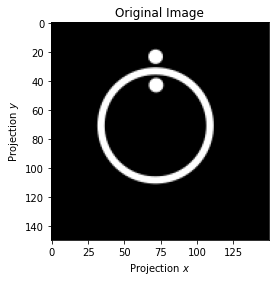

In [1]:
# A First Example
from skimage.transform import radon, iradon, iradon_sart
import matplotlib.pyplot as plt
import numpy as np
import cv2

#load the original tissue and convert to greyscale
tissue_img = cv2.imread('images/test_3.png',0)

#Plot original Image
plt.imshow(tissue_img, cmap = 'gray')
plt.xlabel('Projection $x$')
plt.ylabel('Projection $y$')
plt.title('Original Image')
plt.savefig('output/original.jpeg')
plt.show()

The number of projections `num_proj` influences the quality of the reconstructed image, the greater the number of projections we obtain the greater the amount of information we collect in order to reconstruct our image $\rightarrow$ the better the quality. _Of course in a clinical situation this means longer scan time and therefore more dose deposited to the patient_

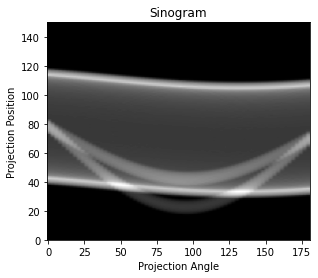

In [7]:
#init array of angles to perform projections
num_proj = 70 # max(tissue_img.shape)
thetas = np.linspace(0,180,num_proj, endpoint=False)

#Capture Data i.e perform forward projection and get sinogram
ct_data = radon(tissue_img, thetas)
dx, dy = 0.5 * 180.0 / max(tissue_img.shape), 0.5 / ct_data.shape[0]

#Plot attenuation intensity for num_proj == 1, for num_proj > 1 we are stacking so it's not valid
if num_proj == 1:
    x = np.linspace(0,len(ct_data),len(ct_data))
    I = ct_data[::-1,0]
    plt.plot(I,x, color="red", linewidth = 2)

#Plot of sinogram / stack of projections3
plt.imshow(ct_data, cmap = 'gray', extent=(-dx, 180.0 + dx, -dy, ct_data.shape[0] + dy))
plt.ylabel('Projection Position')
plt.xlabel('Projection Angle')
plt.title('Sinogram')
plt.savefig('output/sinogram.jpeg')
plt.show()

To reconstruct the image, we take each projection and rotate it by the angle it was obtained, we do this for all projections and then stack them on top of each from smallest angle to $180^{\circ}$.

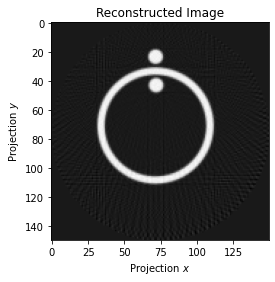

In [8]:
#Plot reconstructed image
ct_image = iradon(ct_data, theta = thetas, filter_name ='ramp')

plt.imshow(ct_image, cmap = 'gray')
plt.title('Reconstructed Image')
plt.xlabel('Projection $x$')
plt.ylabel('Projection $y$')
plt.savefig('output/reconstruct.jpeg')
plt.show()